### 서울시 구별 CCTV 현황 분석
* 구별 인구당 cctv 댓수 파악
* 인구당 cctv 수와 상관관계가 높은 요인 분석

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# 구별 cctv 수 데이터

cctv_seoul = pd.read_csv('./Pandas_data_file/01. CCTV_in_Seoul.csv')
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [32]:
# 특정 column 변경 -> 딕셔너리 형으로

cctv_seoul.rename(columns = {'기관명':'구별'}, inplace = True)
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [33]:
# 구별 인구수 데이터

pop_seoul = pd.read_excel('./Pandas_data_file/01. population_in_Seoul.xls')
pop_seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [34]:
# 데이터 전처리

pop_seoul = pd.read_excel('./Pandas_data_file/01. population_in_Seoul.xls',header=2, \
                         usecols = [1,3,6,9,13])
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [35]:
pop_seoul.columns = ['구별','인구수', '한국인','외국인', '고령자']
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [36]:
## 문제
# 1. CCTV 수를 기준으로 구를 정렬하시오.
# 2. 2016년도에 cctv수 증가율이 높은 상위 5개 구
# 3. 인구당 cctv 수가 가장 높은 구 상위 5개 
# 4. 인구수, 외국인비율, 고령자 비율 중에서 인구당 cctv 수에 가장 큰 영향을 미치는 요소는 무엇인가?

In [37]:
# 1. CCTV 수를 기준으로 구를 정렬하시오.

cctv_seoul.sort_values('소계', ascending= False).head()


,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [43]:
# 2. 2016년도에 cctv수 증가율이 높은 상위 5개 구

# 증가율 column 추가
cctv_seoul['증가율'] = (cctv_seoul['2016년']-cctv_seoul['2015년'])/cctv_seoul['2015년']

# 데이터 뽑기 (.values)
cctv_seoul.sort_values('증가율',ascending=False).head()['구별'].values



array(['양천구', '도봉구', '송파구', '중구', '서대문구'], dtype=object)

In [46]:
# 3. 인구당 cctv 수가 가장 높은 구 상위 5개 

# 구별 인구당 cctv 수 => cctv 수/ 인구수

cctv_seoul['인구당cctv'] = cctv_seoul['소계']/pop_seoul['인구수']
cctv_seoul['인구당cctv'].head()

0    0.000273
1    0.004748
2    0.005614
3    0.003620
4    0.004807
Name: 인구당cctv, dtype: float64

In [47]:
# 인구당 cctv 상위 5개  

cctv_seoul.sort_values('인구당cctv', ascending='False')['구별'].head().values


array(['강남구', '중랑구', '마포구', '중구', '송파구'], dtype=object)

In [ ]:
# 4. 인구수, 외국인비율, 고령자 비율 중에서 인구당 cctv 수에 가장 큰 영향을 미치는 요소는 무엇인가?

# 인구수 외국인비율 고령자비율
# 영향을 준다? corr 상관관계가 높으면 영향을 주는 것

In [48]:
# 데이터 확인
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,증가율,인구당cctv
0,강남구,2780,1292,430,584,932,0.595890,0.000273
1,강동구,773,379,99,155,377,1.432258,0.004748
2,강북구,748,369,120,138,204,0.478261,0.005614
3,강서구,884,388,258,184,81,-0.559783,0.003620
4,관악구,1496,846,260,390,613,0.571795,0.004807


In [49]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [68]:
# cctv소계 와 인구수,한국인,외국인.고령자 비율과 corr 하기 위해 df 전처리

df2 = pop_seoul.copy()

df2['한국인비율']= df2['한국인']/df2['인구수']
df2['외국인비율']= df2['외국인']/df2['인구수']
df2['고령자비율']= df2['고령자']/df2['인구수']
df2['cctv소계'] = cctv_seoul['소계']

# column 삭제 drop (inplace=True 써줘야함)

df2.drop(columns = ['한국인','외국인','고령자'],inplace = True)
df2.head(10)

,구별,인구수,한국인비율,외국인비율,고령자비율,cctv소계
0,합계,10197604.0,0.973461,0.026539,0.129585,2780.0
1,종로구,162820.0,0.943305,0.056695,0.156154,773.0
2,중구,133240.0,0.932993,0.067007,0.155839,748.0
3,용산구,244203.0,0.939612,0.060388,0.148364,884.0
4,성동구,311244.0,0.974734,0.025266,0.128507,1496.0
5,광진구,372164.0,0.959821,0.040179,0.113428,707.0
6,동대문구,369496.0,0.958276,0.041724,0.146613,1561.0
7,중랑구,414503.0,0.988852,0.011148,0.136969,1015.0
8,성북구,461260.0,0.975096,0.024904,0.140251,1265.0
9,강북구,330192.0,0.989382,0.010618,0.166003,485.0


In [69]:
df2.corrwith(df2['cctv소계'])

인구수       0.596893
한국인비율    -0.018397
외국인비율     0.018397
고령자비율    -0.133241
cctv소계    1.000000
dtype: float64

In [70]:
df2.corr()

,인구수,한국인비율,외국인비율,고령자비율,cctv소계
인구수,1.000000,0.075464,-0.075464,-0.085331,0.596893
한국인비율,0.075464,1.000000,-1.000000,-0.268436,-0.018397
외국인비율,-0.075464,-1.000000,1.000000,0.268436,0.018397
고령자비율,-0.085331,-0.268436,0.268436,1.000000,-0.133241
cctv소계,0.596893,-0.018397,0.018397,-0.133241,1.000000


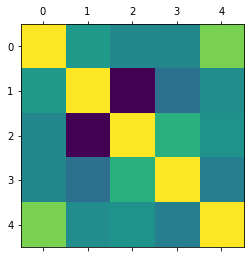

In [64]:
#시각화

#1.
plt.matshow(df2.corr())

C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48708 mi

<AxesSubplot:>

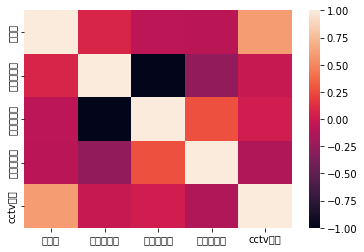

In [67]:
#2.

sns.heatmap(df2.corr())